In [1]:
from rgrow import Tile, TileSet
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tiles = {f't_{i}_{j}':
    Tile(
        edges = [f'v_{i}_{j}', f'h_{i}_{j+1}', f'v_{i+1}_{j}', f'h_{i}_{j}'],
        name = f't_{i}_{j}',
        stoic = 1.0
    )
    for i in range(0, 20) 
    for j in range(0, 20)}

for (i, j) in []:
    tiles[f't_{i}_{j}'].stoic = 5

In [3]:
tileset = TileSet(
    list(tiles.values()),
    gse=5.5,
    gmc=10.0,
    model="kTAM",
    fission="keep-weighted",
)

In [4]:
sys = tileset.create_system()

In [5]:
res = tileset.run_ffs(keep_configs=True, target_size=50, max_configs=200)

In [6]:
res

FFSResult(5.4283e-10 M/s, [0.029120559114735003, 0.04484304932735426, 0.10845986984815618, 0.2403846153846154, 0.23201856148491878, 0.390625, 0.23809523809523808, 0.47619047619047616, 0.5586592178770949, 0.4219409282700422, 0.6369426751592356, 0.6410256410256411, 0.5434782608695652, 0.6134969325153374, 0.7518796992481203, 0.6711409395973155, 0.6944444444444444, 0.7575757575757576, 0.7633587786259542, 0.8403361344537815, 0.78125, 0.8, 0.819672131147541, 0.8849557522123894, 0.8771929824561403, 0.8620689655172413, 0.9523809523809523, 0.9803921568627451, 0.8620689655172413, 0.9615384615384616, 0.9615384615384616, 0.9174311926605505, 0.9523809523809523, 0.9803921568627451, 1.0, 0.9803921568627451, 0.9900990099009901, 0.9523809523809523, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 1.0, 1.0, 1.0, 0.9615384615384616, 0.9900990099009901, 1.0, 1.0])

Text(0, 0.5, 'forward probability')

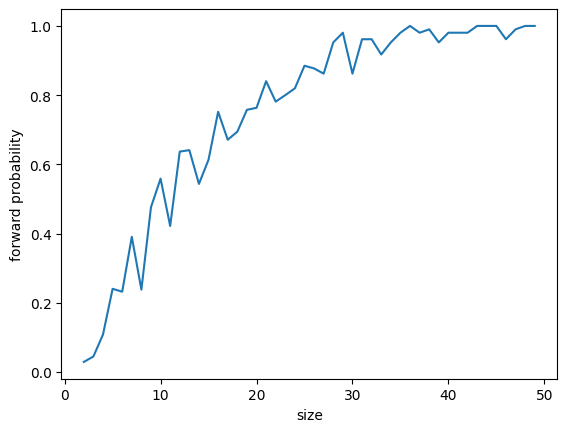

In [7]:
plt.plot(2+np.arange(len(res.forward_vec)), res.forward_vec)
plt.xlabel('size')
plt.ylabel('forward probability')

Text(0, 0.5, 'finish vs melt probability')

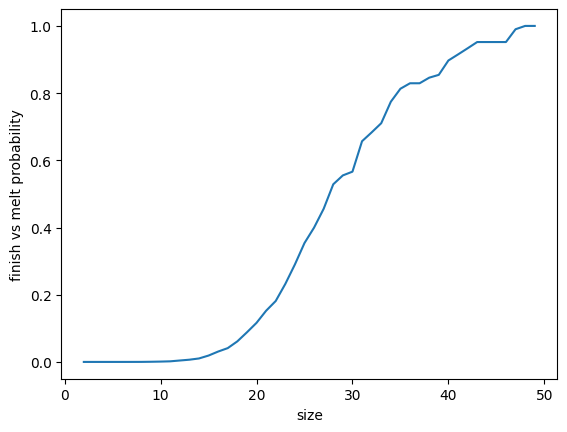

In [8]:
a = np.array(res.forward_vec)
full_prob = a[::-1].cumprod()[::-1]

plt.plot(2+np.arange(len(res.forward_vec)), full_prob)
plt.xlabel('size')
plt.ylabel('finish vs melt probability')

In [9]:
surfaces = res.surfaces_dataframe()

In [10]:
configs = res.configs_dataframe()

In [11]:
res

FFSResult(5.4283e-10 M/s, [0.029120559114735003, 0.04484304932735426, 0.10845986984815618, 0.2403846153846154, 0.23201856148491878, 0.390625, 0.23809523809523808, 0.47619047619047616, 0.5586592178770949, 0.4219409282700422, 0.6369426751592356, 0.6410256410256411, 0.5434782608695652, 0.6134969325153374, 0.7518796992481203, 0.6711409395973155, 0.6944444444444444, 0.7575757575757576, 0.7633587786259542, 0.8403361344537815, 0.78125, 0.8, 0.819672131147541, 0.8849557522123894, 0.8771929824561403, 0.8620689655172413, 0.9523809523809523, 0.9803921568627451, 0.8620689655172413, 0.9615384615384616, 0.9615384615384616, 0.9174311926605505, 0.9523809523809523, 0.9803921568627451, 1.0, 0.9803921568627451, 0.9900990099009901, 0.9523809523809523, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 1.0, 1.0, 1.0, 0.9615384615384616, 0.9900990099009901, 1.0, 1.0])

In [12]:
configs

surface_index,config_index,size,time,previous_config,canvas,min_i,min_j,shape_i,shape_j
u64,u64,u32,f64,u64,list[u32],u64,u64,u64,u64
0,0,2,0.0,257,"[257, 258]",32,32,1,2
0,1,2,0.0,206,"[206, 226]",32,32,2,1
0,2,2,0.0,234,"[214, 234]",32,32,2,1
0,3,2,0.0,314,"[314, 315]",32,32,1,2
0,4,2,0.0,72,"[72, 92]",32,32,2,1
…,…,…,…,…,…,…,…,…,…
48,95,50,1.164999,76,"[0, 129, … 0]",27,28,8,8
48,96,50,0.687998,69,"[0, 209, … 335]",31,28,7,8
48,97,50,1.323112,57,"[0, 22, … 0]",29,27,10,7


In [13]:
surfaces = res.surfaces
surfaces

[FFSLevelRef(n_configs=100, n_trials=100, target_size=2, p_r=1, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=3434, target_size=3, p_r=0.029120559114735003, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=2230, target_size=4, p_r=0.04484304932735426, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=922, target_size=5, p_r=0.10845986984815618, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=416, target_size=6, p_r=0.2403846153846154, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=431, target_size=7, p_r=0.23201856148491878, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=256, target_size=8, p_r=0.390625, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=420, target_size=9, p_r=0.23809523809523808, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=210, target_size=10, p_r=0.47619047619047616, has_stored_states=true),
 FFSLevelRef(n_configs=100, n_trials=179, target_size=11, p_r=0

In [14]:
surfaces[10].configs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 

In [15]:
state = surfaces[10].states[10]
state

FFSStateRef(n_tiles=12, time=0.048159772254851636 s, events=122, size=(64, 64), total_rate=4851.620447968194)

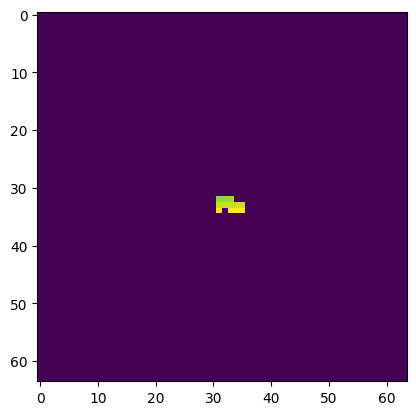

In [16]:
plt.imshow(state.canvas_view)